In [114]:
import sklearn
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

import matplotlib.pyplot as plt 
import seaborn as sns

In [97]:
train = pd.read_csv('./Data/Train.csv')
valid = pd.read_csv('./Data/Valid.csv')

### Train

In [98]:
train.head()

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
0,0,0.0,0,0,4,2,2,0,73
1,0,1.2,1,0,4,2,2,1,73
2,1,1.8,1,0,4,1,2,0,53
3,0,0.0,1,0,4,2,2,0,57
4,1,52.0,1,1,6,4,3,0,65


In [126]:
Label = train['Relapse']
InputFeature = train[train.columns[1:]]
InputFeature = sm.add_constant(InputFeature)

In [127]:
model = sm.Logit(Label, InputFeature)
model = model.fit()
print(model.params)

Optimization terminated successfully.
         Current function value: 0.614428
         Iterations 8
const        -1.969500
CEA_Post      0.018205
Lymphatic     0.639076
Vascular      0.582773
pStage       -0.159252
pT            0.240697
pN            0.511047
Perineural    0.304236
Age          -0.003822
dtype: float64


In [102]:
print( model.summary() )

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                            8
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                 0.09721
Time:                        16:44:40   Log-Likelihood:                -240.86
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 1.785e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9695      0.828     -2.378      0.017      -3.593      -0.346
CEA_Post       0.0182      0.009      2.127      0.033       0.001       0.035
Lymphatic      0.6391      0.261      2.445      0.0

In [103]:
np.exp(model.params).round(4)

const         0.1395
CEA_Post      1.0184
Lymphatic     1.8947
Vascular      1.7910
pStage        0.8528
pT            1.2721
pN            1.6670
Perineural    1.3556
Age           0.9962
dtype: float64

### Valid

In [108]:
Label_v = valid['Relapse']
InputFeature_v = valid[valid.columns[1:]]

In [109]:
InputFeature_v = sm.add_constant(InputFeature_v)
InputFeature_v

C:\Users\daess\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
0,1.0,1.2,1,0,5,1,3,0,42
1,1.0,1.0,1,0,4,2,2,0,45
2,1.0,9.2,1,0,6,4,3,0,69
3,1.0,0.0,0,0,5,5,1,0,64
4,1.0,2.3,1,1,5,1,3,0,72
...,...,...,...,...,...,...,...,...,...
93,1.0,2.3,0,1,4,4,1,0,64
94,1.0,6.2,1,1,5,4,2,0,72
95,1.0,1.5,1,1,5,2,3,0,60
96,1.0,3.5,0,0,2,2,1,0,60


In [110]:
Predicted = model.predict(InputFeature_v)
Predicted.head()

0    0.379538
1    0.350302
2    0.528416
3    0.214871
4    0.499161
dtype: float64

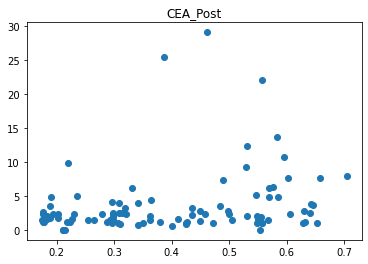

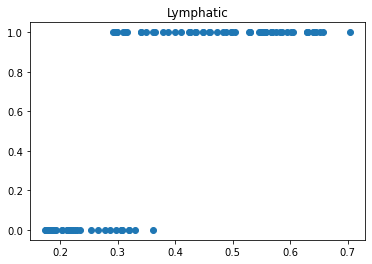

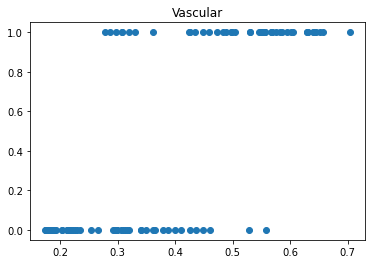

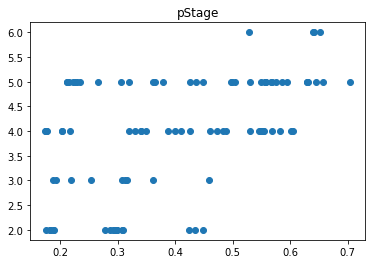

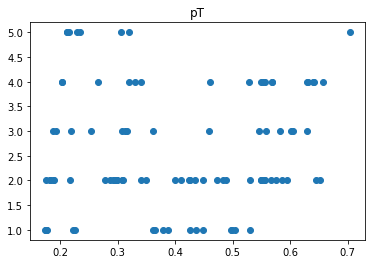

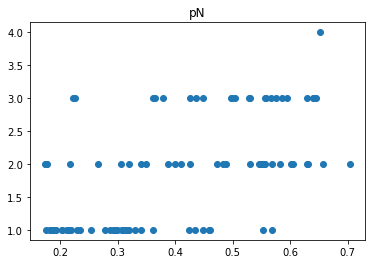

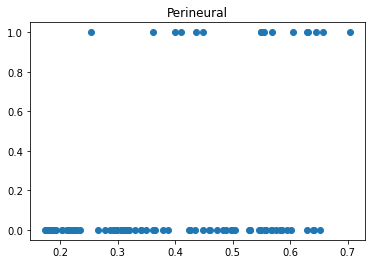

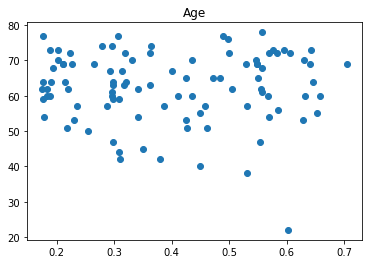

In [111]:
for column in InputFeature_v.columns[1:]:
    plt.plot(model.predict(InputFeature_v), valid[column], 'o')
    plt.title(column)
    plt.show()

### Validation set에서 성능 검증

In [116]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Label_v,  Predicted)

In [117]:
thresholds

array([1.70391969, 0.70391969, 0.64511504, 0.63982113, 0.62877861,
       0.60598789, 0.58560303, 0.5759911 , 0.56862677, 0.56675766,
       0.55324668, 0.5487903 , 0.53118908, 0.53069509, 0.50461823,
       0.49761457, 0.4893671 , 0.47218618, 0.46039984, 0.42552556,
       0.42460134, 0.41098952, 0.38697002, 0.36457925, 0.36219424,
       0.36209093, 0.35030216, 0.30761229, 0.3065629 , 0.29826863,
       0.2979255 , 0.29636998, 0.29575868, 0.29171973, 0.27850381,
       0.21911577, 0.21487127, 0.2116653 , 0.18829296, 0.18306326,
       0.17798518, 0.17617332, 0.17460312])

In [119]:
fpr

array([0.        , 0.01666667, 0.01666667, 0.05      , 0.05      ,
       0.06666667, 0.06666667, 0.1       , 0.1       , 0.11666667,
       0.11666667, 0.15      , 0.15      , 0.16666667, 0.16666667,
       0.2       , 0.2       , 0.23333333, 0.23333333, 0.35      ,
       0.35      , 0.36666667, 0.36666667, 0.4       , 0.4       ,
       0.41666667, 0.41666667, 0.58333333, 0.58333333, 0.61666667,
       0.61666667, 0.66666667, 0.66666667, 0.68333333, 0.68333333,
       0.8       , 0.8       , 0.81666667, 0.91666667, 0.91666667,
       0.95      , 0.95      , 1.        ])

In [120]:
tpr

array([0.        , 0.        , 0.07894737, 0.07894737, 0.15789474,
       0.15789474, 0.23684211, 0.23684211, 0.28947368, 0.28947368,
       0.42105263, 0.42105263, 0.5       , 0.5       , 0.55263158,
       0.55263158, 0.57894737, 0.57894737, 0.60526316, 0.60526316,
       0.63157895, 0.63157895, 0.68421053, 0.68421053, 0.71052632,
       0.71052632, 0.73684211, 0.73684211, 0.76315789, 0.76315789,
       0.78947368, 0.78947368, 0.81578947, 0.81578947, 0.86842105,
       0.86842105, 0.92105263, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 1.        , 1.        ])

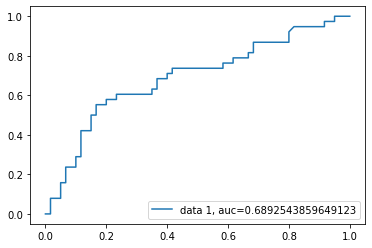

In [121]:
auc = sklearn.metrics.roc_auc_score(Label_v, Predicted)
auc
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [122]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

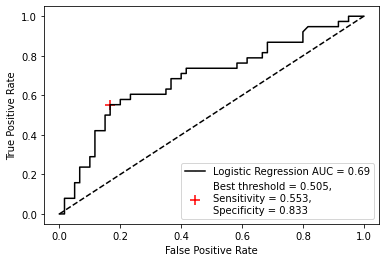

In [124]:
#plot roc and best threshold
sens, spec = tpr[ix], 1-fpr[ix]
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr, tpr, marker='.', color='black', markersize=0.05, label="Logistic Regression AUC = %.2f" % 
         sklearn.metrics.roc_auc_score(Label_v, Predicted))
plt.scatter(fpr[ix], tpr[ix], marker='+', s=100, color='r', 
            label='Best threshold = %.3f, \nSensitivity = %.3f, \nSpecificity = %.3f' % (best_thresh, sens, spec))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()